In [366]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [367]:
data=pd.read_csv("C:\\Users\\sn302\\Downloads\\Salary Data.csv")
data.head(10)

,Age,Gender,Education_Level,Job_Title,HoursWorkedPerWeek,Years_of_Experience,Salary
0,32,Male,Bachelor's,Software Engineer,127.987109,5.0,90000
1,28,Female,Master's,Data Analyst,118.492674,3.0,65000
2,45,Male,PhD,Senior Manager,101.192607,15.0,150000
3,36,Female,Bachelor's,Sales Associate,87.061264,7.0,60000
4,52,Male,Master's,Director,113.964466,20.0,200000
5,29,Male,Bachelor's,Marketing Analyst,107.869708,2.0,55000
6,42,Female,Master's,Product Manager,117.903864,12.0,120000
7,31,Male,Bachelor's,Sales Manager,112.703436,4.0,80000
8,26,Female,Bachelor's,Marketing Coordinator,120.991054,1.0,45000
9,38,Male,PhD,Senior Scientist,89.295296,10.0,110000


In [368]:
data.tail(3)

,Age,Gender,Education_Level,Job_Title,HoursWorkedPerWeek,Years_of_Experience,Salary
370,29,Female,Bachelor's,Junior Project Manager,72.561977,2.0,40000
371,34,Male,Bachelor's,Senior Operations Coordinator,67.728772,7.0,90000
372,44,Female,PhD,Senior Business Analyst,129.423406,15.0,150000


In [369]:
data.shape

(373, 7)

# Finding Null Values

In [370]:
data.isna().sum()

Age                    0
Gender                 0
Education_Level        0
Job_Title              0
HoursWorkedPerWeek     0
Years_of_Experience    0
Salary                 0
dtype: int64

In [371]:
print(data.Education_Level.value_counts())

Education_Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64


In [372]:
print(data.Job_Title.value_counts())

Job_Title
Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Senior Marketing Manager            9
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: count, Length: 174, dtype: int64


In [373]:
print(data.Salary.value_counts())

Salary
40000     31
50000     22
95000     22
180000    20
120000    20
90000     18
150000    18
45000     18
160000    17
60000     17
110000    17
170000    16
130000    14
100000    14
140000    14
35000     13
80000     12
55000     10
85000     10
70000      9
65000      9
105000     6
190000     4
75000      4
115000     3
250000     2
200000     2
135000     2
175000     2
125000     1
30000      1
220000     1
185000     1
145000     1
155000     1
350        1
Name: count, dtype: int64


In [374]:
job_counts = data['Salary'].value_counts()
valid_jobs = job_counts[job_counts > 2].index
data = data[data['Salary'].isin(valid_jobs)].reset_index(drop=True)

In [375]:
import pandas as pd
bins = [0, 50000, 100000, 150000, 200000]
labels = ['<50k', '<1L', '<1.5L', '<2L']
data['Salary_Range'] = pd.cut(data['Salary'], bins=bins, labels=labels, include_lowest=True)
print(data['Salary_Range'].value_counts())

Salary_Range
<1L      125
<1.5L     92
<50k      84
<2L       57
Name: count, dtype: int64


In [376]:
print(data.Gender.value_counts())

Gender
Male      181
Female    177
Name: count, dtype: int64


# Finding and Handling Outliers

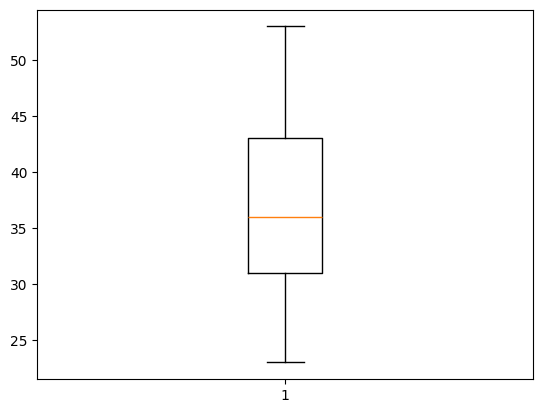

In [377]:
plt.boxplot(data['Age'])
plt.show()

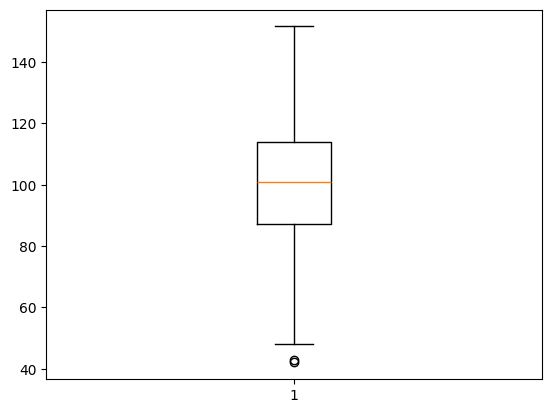

In [378]:
plt.boxplot(data['HoursWorkedPerWeek'])
plt.show()

In [379]:
data=data[(data['HoursWorkedPerWeek']<=120) & (data['HoursWorkedPerWeek']>=60)]

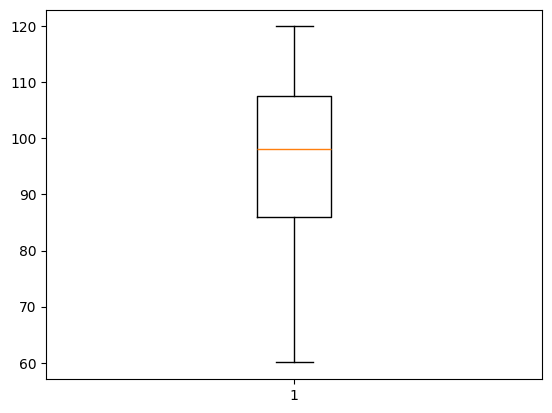

In [380]:
plt.boxplot(data['HoursWorkedPerWeek'])
plt.show()

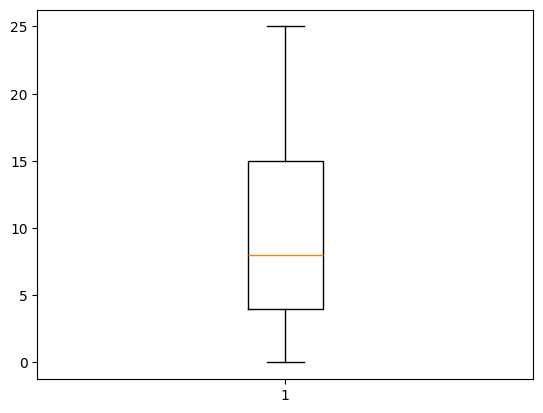

In [381]:
plt.boxplot(data['Years_of_Experience'])
plt.show()

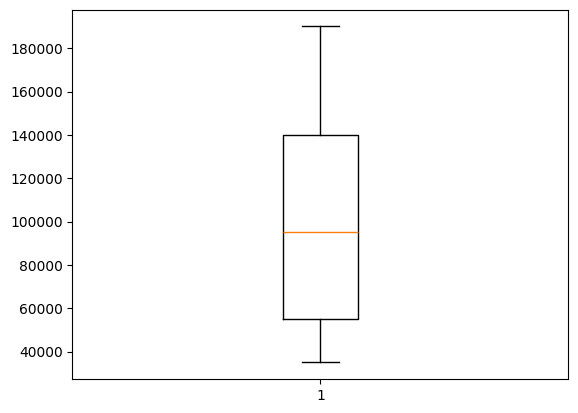

In [382]:
plt.boxplot(data['Salary'])
plt.show()

In [383]:
data

,Age,Gender,Education_Level,Job_Title,HoursWorkedPerWeek,Years_of_Experience,Salary,Salary_Range
1,28,Female,Master's,Data Analyst,118.492674,3.0,65000,<1L
2,45,Male,PhD,Senior Manager,101.192607,15.0,150000,<1.5L
3,36,Female,Bachelor's,Sales Associate,87.061264,7.0,60000,<1L
4,29,Male,Bachelor's,Marketing Analyst,107.869708,2.0,55000,<1L
5,42,Female,Master's,Product Manager,117.903864,12.0,120000,<1.5L
...,...,...,...,...,...,...,...,...
351,44,Female,PhD,Senior Data Engineer,91.134355,16.0,160000,<2L
352,33,Male,Bachelor's,Junior Business Analyst,82.303946,4.0,60000,<1L
353,35,Female,Bachelor's,Senior Marketing Analyst,96.541079,8.0,85000,<1L
355,29,Female,Bachelor's,Junior Project Manager,72.561977,2.0,40000,<50k


# Encoding using LabelEncoder

In [384]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Gender']=encoder.fit_transform(data['Gender'])
data['Education_Level']=encoder.fit_transform(data['Education_Level'])
data['Job_Title']=encoder.fit_transform(data['Job_Title'])
y_encoder = encoder.fit_transform(y)
data

,Age,Gender,Education_Level,Job_Title,HoursWorkedPerWeek,Years_of_Experience,Salary,Salary_Range
1,28,0,1,11,118.492674,3.0,65000,<1L
2,45,1,2,109,101.192607,15.0,150000,<1.5L
3,36,0,0,84,87.061264,7.0,60000,<1L
4,29,1,0,67,107.869708,2.0,55000,<1L
5,42,0,1,77,117.903864,12.0,120000,<1.5L
...,...,...,...,...,...,...,...,...
351,44,0,2,94,91.134355,16.0,160000,<2L
352,33,1,0,35,82.303946,4.0,60000,<1L
353,35,0,0,110,96.541079,8.0,85000,<1L
355,29,0,0,56,72.561977,2.0,40000,<50k


# Spliting data in to X(independent variable) and Y (dependent variable)

In [385]:
x = data.drop(columns=['Salary', 'Salary_Range'])
y=data['Salary_Range']
x

,Age,Gender,Education_Level,Job_Title,HoursWorkedPerWeek,Years_of_Experience
1,28,0,1,11,118.492674,3.0
2,45,1,2,109,101.192607,15.0
3,36,0,0,84,87.061264,7.0
4,29,1,0,67,107.869708,2.0
5,42,0,1,77,117.903864,12.0
...,...,...,...,...,...,...
351,44,0,2,94,91.134355,16.0
352,33,1,0,35,82.303946,4.0
353,35,0,0,110,96.541079,8.0
355,29,0,0,56,72.561977,2.0


In [386]:
y

1        <1L
2      <1.5L
3        <1L
4        <1L
5      <1.5L
       ...  
351      <2L
352      <1L
353      <1L
355     <50k
356      <1L
Name: Salary_Range, Length: 289, dtype: category
Categories (4, object): ['<50k' < '<1L' < '<1.5L' < '<2L']

# Scaler will convert entire data in one range that is 0 to 1

In [387]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x

array([[0.17241379, 0.        , 0.5       , 0.07586207, 0.97551026,
        0.12      ],
       [0.75862069, 1.        , 1.        , 0.75172414, 0.68681117,
        0.6       ],
       [0.44827586, 0.        , 0.        , 0.57931034, 0.45099093,
        0.28      ],
       ...,
       [0.4137931 , 0.        , 0.        , 0.75862069, 0.60918765,
        0.32      ],
       [0.20689655, 0.        , 0.        , 0.3862069 , 0.20903053,
        0.08      ],
       [0.37931034, 1.        , 0.        , 0.8       , 0.12837524,
        0.28      ]])

In [388]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

le = LabelEncoder()
y_encoded = le.fit_transform(y)  

# 2. Split the encoded data
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),  # Classification
    "KNN": KNeighborsClassifier(),                # Classification
    "SVM": SVC()
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))


LogisticRegression Accuracy: 0.8621
              precision    recall  f1-score   support

       <1.5L       0.75      0.86      0.80        14
         <1L       0.89      0.89      0.89        19
         <2L       0.82      0.82      0.82        11
        <50k       1.00      0.86      0.92        14

    accuracy                           0.86        58
   macro avg       0.87      0.86      0.86        58
weighted avg       0.87      0.86      0.86        58

KNN Accuracy: 0.7759
              precision    recall  f1-score   support

       <1.5L       0.71      0.71      0.71        14
         <1L       0.70      0.74      0.72        19
         <2L       0.91      0.91      0.91        11
        <50k       0.85      0.79      0.81        14

    accuracy                           0.78        58
   macro avg       0.79      0.79      0.79        58
weighted avg       0.78      0.78      0.78        58

SVM Accuracy: 0.8448
              precision    recall  f1-score   suppor

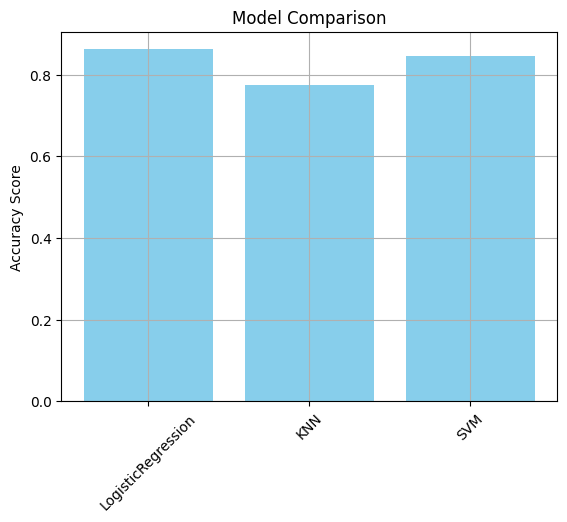

In [389]:
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [390]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)  

# Split data
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# Define models and scaling requirement
models = {
    "LogisticRegression": (LogisticRegression(max_iter=1000), True),
    "KNN": (KNeighborsClassifier(), True),
    "SVM": (SVC(), True)
}

results = {}
trained_pipelines = {}

# Train each model
for name, (model, needs_scaling) in models.items():
    steps = []
    if needs_scaling:
        steps.append(('scaler', StandardScaler()))
    steps.append(('model', model))
    
    pipe = Pipeline(steps)
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    trained_pipelines[name] = pipe
    
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))

# Identify and save best model
best_model_name = max(results, key=results.get)
best_model = trained_pipelines[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

joblib.dump(best_model, "best_model.pkl")
print("✅ Saved best model as best_model.pkl")


LogisticRegression Accuracy: 0.8621
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        14
           1       0.89      0.89      0.89        19
           2       0.82      0.82      0.82        11
           3       1.00      0.86      0.92        14

    accuracy                           0.86        58
   macro avg       0.87      0.86      0.86        58
weighted avg       0.87      0.86      0.86        58

KNN Accuracy: 0.7759
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        14
           1       0.70      0.74      0.72        19
           2       0.91      0.91      0.91        11
           3       0.85      0.79      0.81        14

    accuracy                           0.78        58
   macro avg       0.79      0.79      0.79        58
weighted avg       0.78      0.78      0.78        58

SVM Accuracy: 0.8448
              precision    recall  f1-score   suppor